In [108]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.style as style 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC  
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv('kidney_disease.csv')
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [4]:
data.isnull().sum()/len(data)

id                0.0000
age               0.0225
bp                0.0300
sg                0.1175
al                0.1150
su                0.1225
rbc               0.3800
pc                0.1625
pcc               0.0100
ba                0.0100
bgr               0.1100
bu                0.0475
sc                0.0425
sod               0.2175
pot               0.2200
hemo              0.1300
pcv               0.1750
wc                0.2625
rc                0.3250
htn               0.0050
dm                0.0050
cad               0.0050
appet             0.0025
pe                0.0025
ane               0.0025
classification    0.0000
dtype: float64

In [5]:
print(data.isnull().sum())

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64


In [6]:
data.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [7]:
data['classification'].value_counts()

ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64

In [8]:
for i in data.drop("id",axis=1).columns:
    print('Unique Values in "{}":\n'.format(i),data[i].unique(), "\n\n")
    # data[i].unique --> the data was repeated in each column 

Unique Values in "age":
 [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.] 


Unique Values in "bp":
 [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.] 


Unique Values in "sg":
 [1.02  1.01  1.005 1.015   nan 1.025] 


Unique Values in "al":
 [ 1.  4.  2.  3.  0. nan  5.] 


Unique Values in "su":
 [ 0.  3.  4.  1. nan  2.  5.] 


Unique Values in "rbc":
 [nan 'normal' 'abnormal'] 


Unique Values in "pc":
 ['normal' 'abnormal' nan] 


Unique Values in "pcc":
 ['notpresent' 'present' nan] 


Unique Values in "ba":
 ['notpresent' 'present' nan] 


Unique Values in "bgr":
 [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114. 263. 173.  95. 108. 156. 264. 123.  93. 107. 159.
 140. 17

In [9]:
data[['pcv', 'wc', 'rc', 'dm', 'cad', 'classification']] = data[['pcv', 'wc', 'rc', 'dm', 'cad', 'classification']].replace(to_replace={'\t8400':'8400', '\t6200':'6200', '\t43':'43', '\t?':np.nan, '\tyes':'yes', '\tno':'no', 'ckd\t':'ckd', ' yes':'yes'})

C:\Users\Eng_Dina\AppData\Local\Temp\ipykernel_15748\412174858.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn-darkgrid')


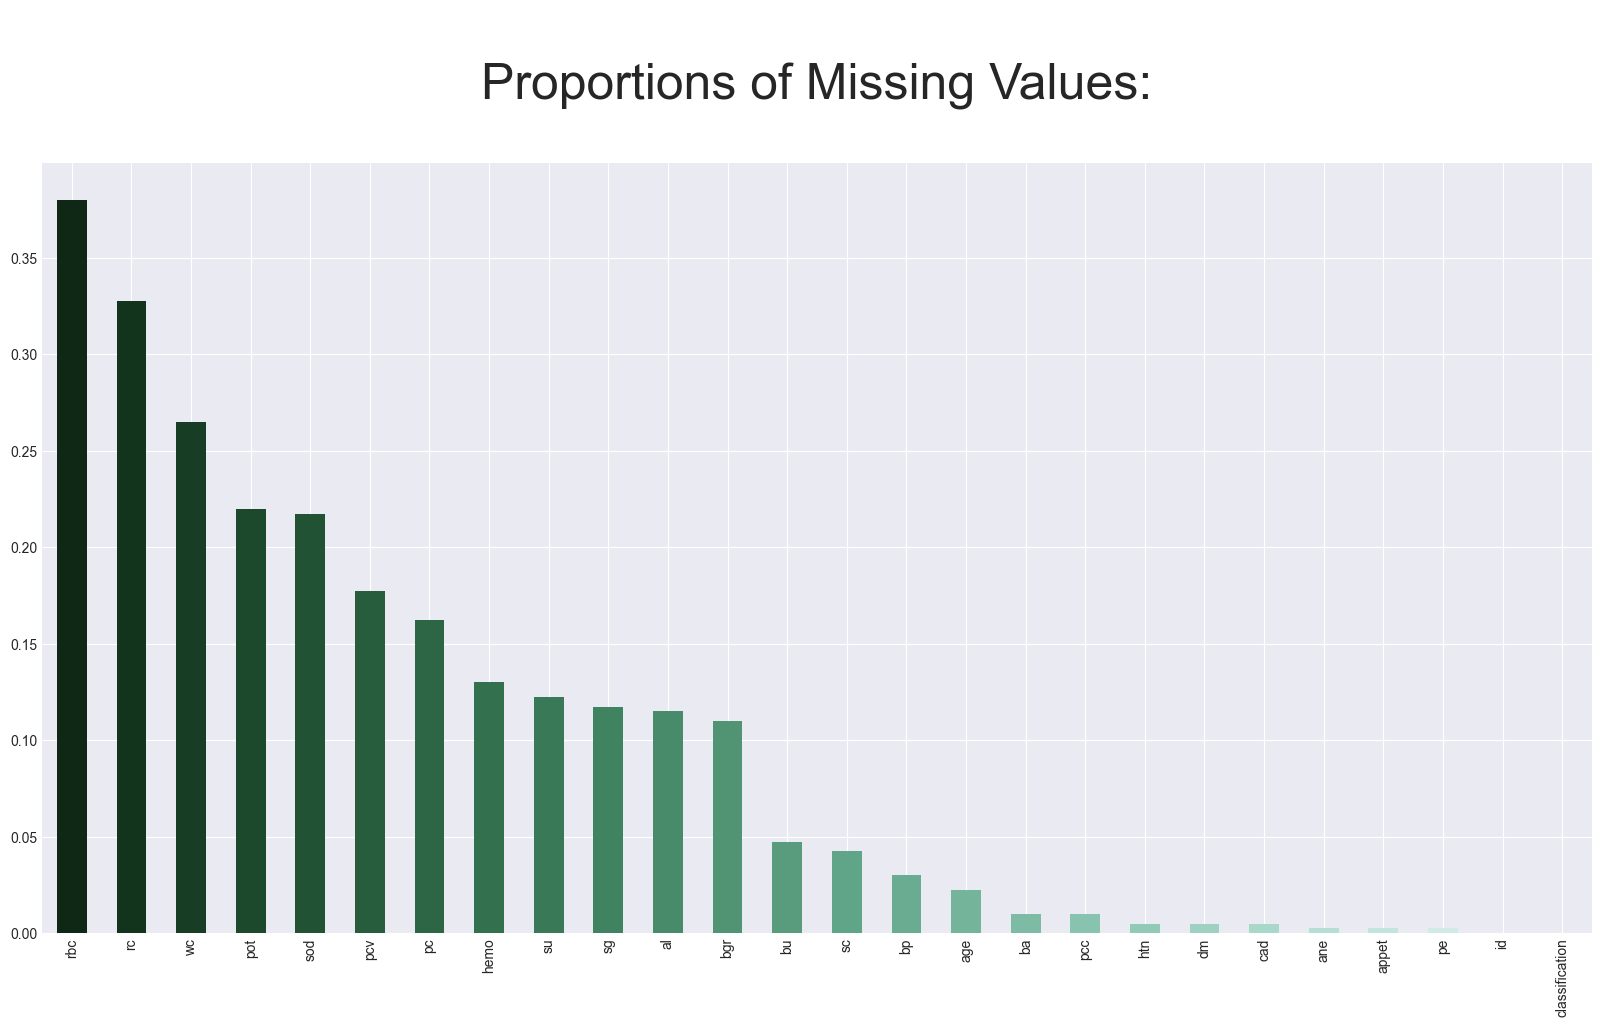

In [10]:

style.use('seaborn-darkgrid')

d = ((data.isnull().sum()/data.shape[0])).sort_values(ascending=False)
# Here we are plotting null values in range of 0-1. It means y axis range is 0-1.
# If bar graph show 0.5 null values that means there are 50% null values in that particular column.
# Hence we are dividing number of null values of each column with total number of rows i.e. 400 (or data.shape[0])

d.plot(kind = 'bar',
       color = sns.cubehelix_palette(start=2,
                                    rot=0.12,
                                    dark=0.12,
                                    light=0.95,
                                    reverse=True,
                                    n_colors=26),
figsize=(20,10))
plt.title("\nProportions of Missing Values:\n",fontsize=36)
plt.show()

C:\Users\Eng_Dina\AppData\Local\Temp\ipykernel_15748\448647166.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i[1]])
C:\Users\Eng_Dina\AppData\Local\Temp\ipykernel_15748\448647166.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i[1]])
C:\Users\Eng_Dina\AppData\Local\Temp\ipyke

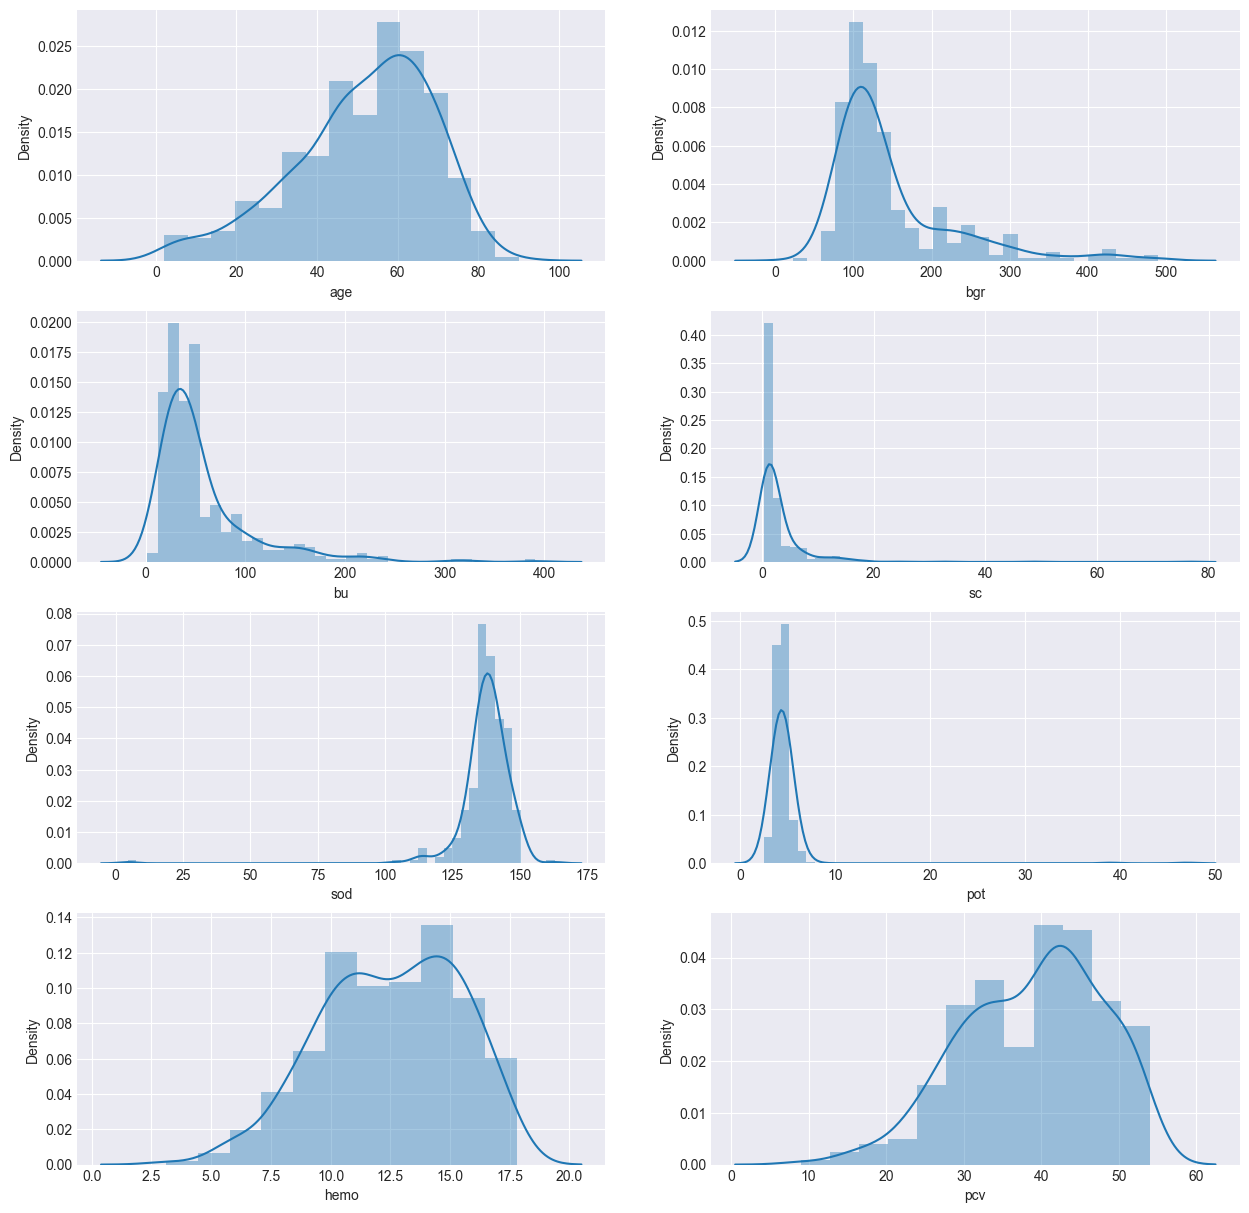

In [11]:
cols=['age', 'bgr', 'bu', 'sc', 'sod','pot','hemo', 'pcv' ]
plt.figure(figsize=(15,15))
for i in enumerate(cols):
    plt.subplot(4,2,i[0]+1)
    sns.distplot(data[i[1]])

C:\Users\Eng_Dina\AppData\Local\Temp\ipykernel_15748\1731684105.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i[1]])
C:\Users\Eng_Dina\AppData\Local\Temp\ipykernel_15748\1731684105.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i[1]])


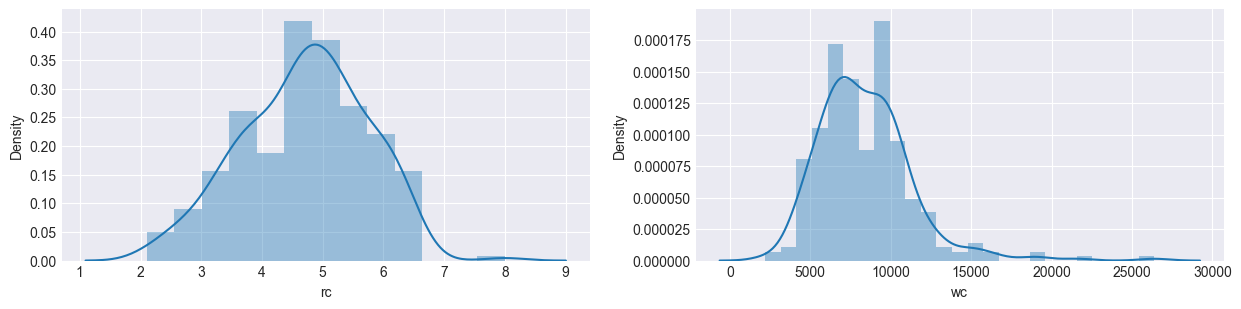

In [12]:
cols=['rc','wc' ]
plt.figure(figsize=(15,15))
for i in enumerate(cols):
    plt.subplot(4,2,i[0]+1)
    sns.distplot(data[i[1]])

In [13]:
data[['age','bgr','bu','sod','sc','pot','hemo','pcv','wc','rc']] = data[['age','bgr','bu','sod','sc','pot','hemo','pcv','wc','rc']].fillna(data[['age','bgr','bu','sod','sc','pot','hemo','pcv','wc','rc']].median())
data[['age','bgr','bu','sod','sc','pot','hemo','pcv','wc','rc']]

,age,bgr,bu,sod,sc,pot,hemo,pcv,wc,rc
0,48.0,121.0,36.0,138.0,1.2,4.4,15.4,44,7800,5.2
1,7.0,121.0,18.0,138.0,0.8,4.4,11.3,38,6000,4.8
2,62.0,423.0,53.0,138.0,1.8,4.4,9.6,31,7500,4.8
3,48.0,117.0,56.0,111.0,3.8,2.5,11.2,32,6700,3.9
4,51.0,106.0,26.0,138.0,1.4,4.4,11.6,35,7300,4.6
...,...,...,...,...,...,...,...,...,...,...
395,55.0,140.0,49.0,150.0,0.5,4.9,15.7,47,6700,4.9
396,42.0,75.0,31.0,141.0,1.2,3.5,16.5,54,7800,6.2
397,12.0,100.0,26.0,137.0,0.6,4.4,15.8,49,6600,5.4
398,17.0,114.0,50.0,135.0,1.0,4.9,14.2,51,7200,5.9


In [89]:
data[['bp','sg','al','su','rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane']] = data[['bp','sg','al','su','rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane']].fillna(data[['bp','sg','al','su','rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane']].mode())
data[['bp','sg','al','su','rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane']]

,bp,sg,al,su,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane
0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,yes,yes,no,good,no,no
1,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,no,no,no,good,no,no
2,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes
3,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes
4,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,no,no,no,good,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,no,no,no,good,no,no
396,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,no,no,no,good,no,no
397,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,no,no,no,good,no,no
398,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,no,no,no,good,no,no


In [90]:
data.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [91]:
data.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [92]:
data[['pcv','wc','age']] = data[['pcv','wc','age']].astype('int64')
data['rc'] = data['rc'].astype('float64')

In [93]:
data.dtypes

id                  int64
age                 int64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                 int64
wc                  int64
rc                float64
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [104]:
data.drop('id',axis=1, inplace=True)
data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,121.0,...,38,6000,4.8,no,no,no,good,no,no,ckd
2,62,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,4.8,no,yes,no,poor,no,yes,ckd
3,48,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


c:\Users\Eng_Dina\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1507: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
c:\Users\Eng_Dina\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1507: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
c:\Users\Eng_Dina\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1507: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
c:\Users\Eng_Dina\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1507: FutureWarning: 

`shade` is 

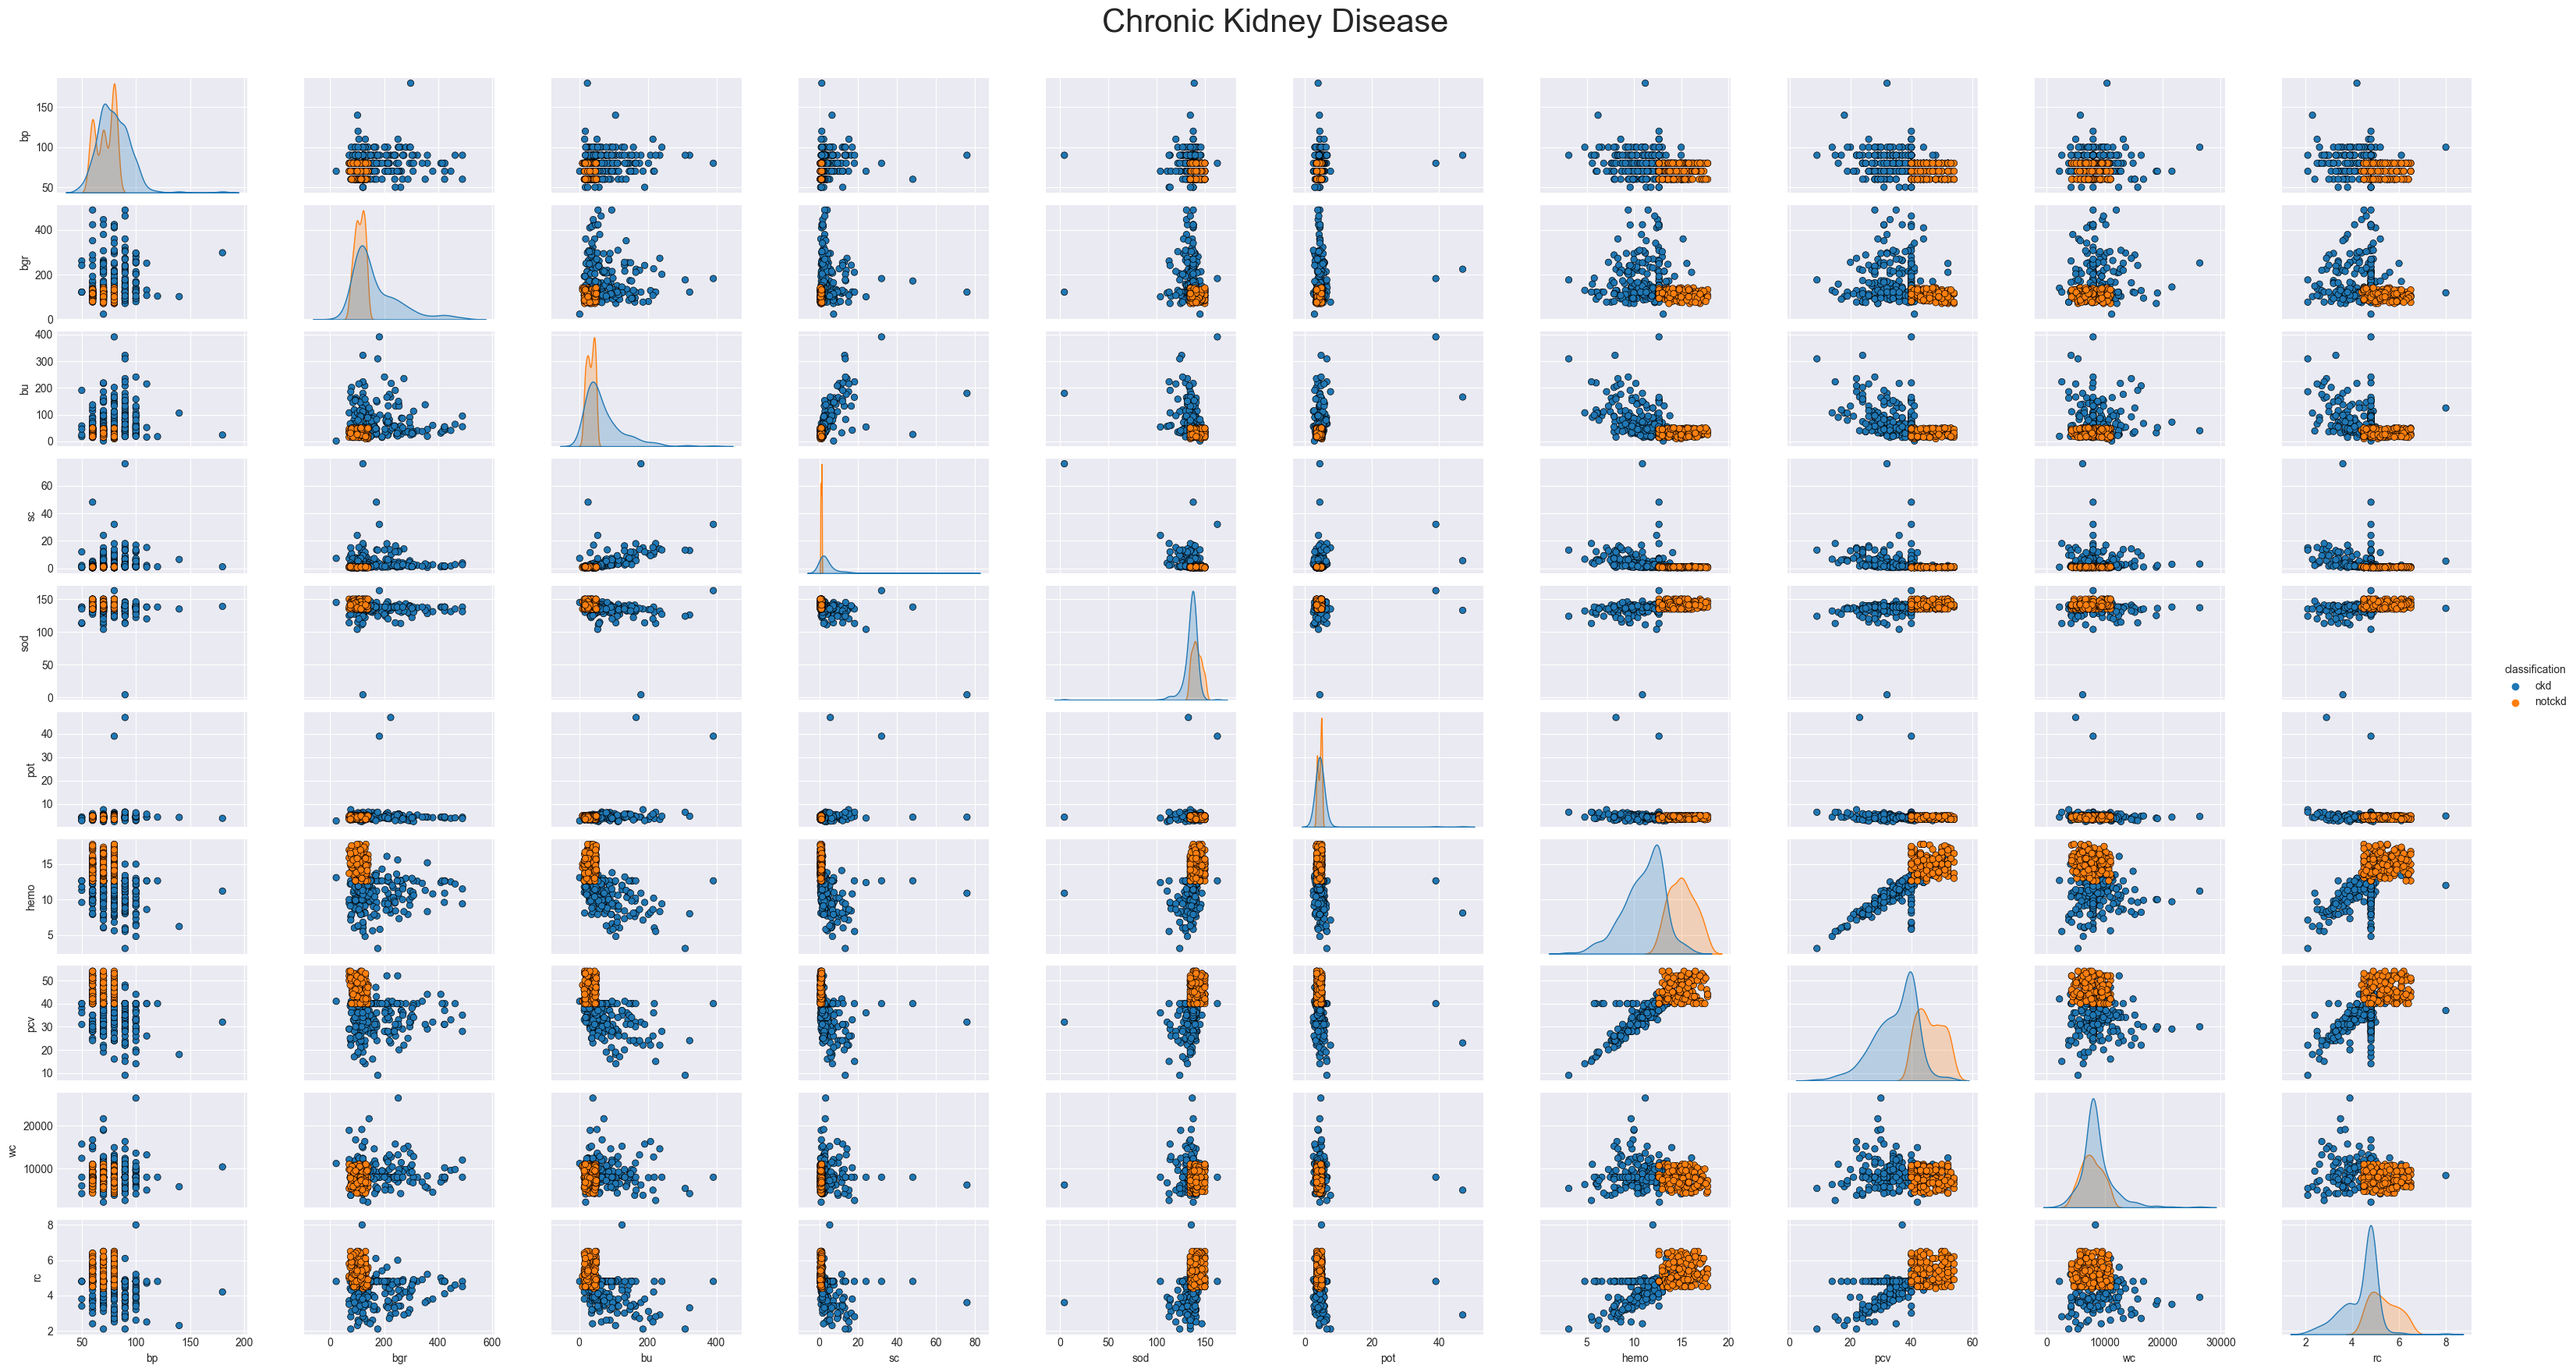

In [106]:
pp = sns.pairplot(data[["bp","bgr","bu","sc","sod","pot","hemo","pcv","wc","rc","classification"]], hue = "classification", height=1.8, aspect=1.8, plot_kws=dict(edgecolor="k", linewidth=0.5), diag_kind="kde", diag_kws=dict(shade=True))
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Chronic Kidney Disease', fontsize=30)

C:\Users\Eng_Dina\AppData\Local\Temp\ipykernel_15748\2028156261.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, fmt=".0%")


<AxesSubplot: >

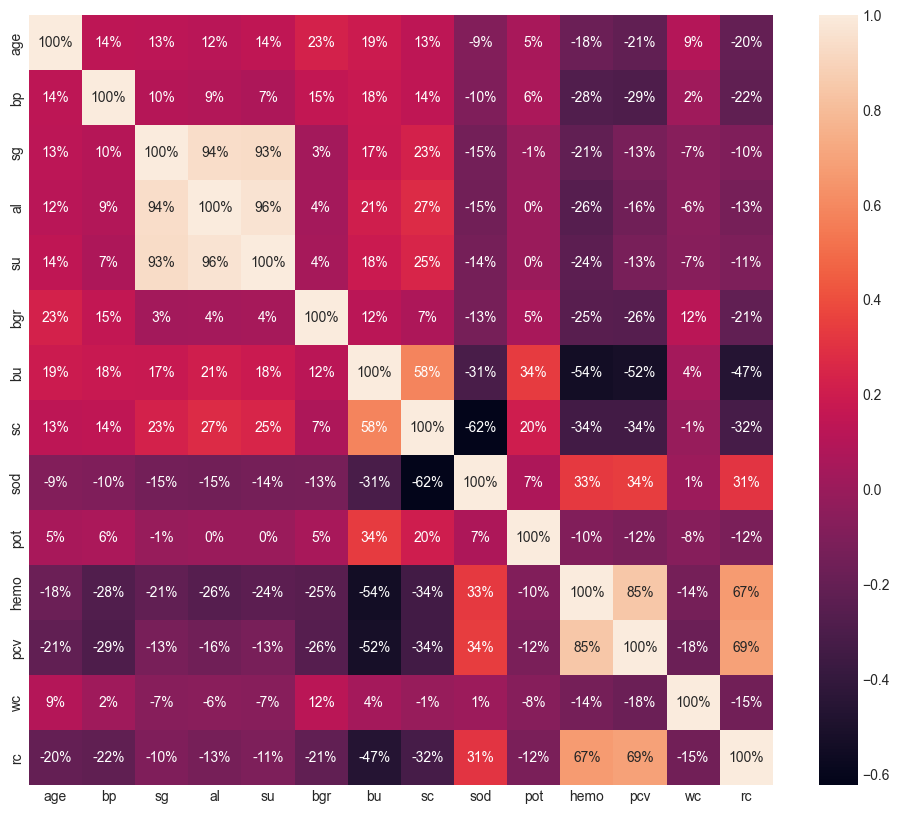

In [105]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot=True, fmt=".0%")

<AxesSubplot: xlabel='classification', ylabel='count'>

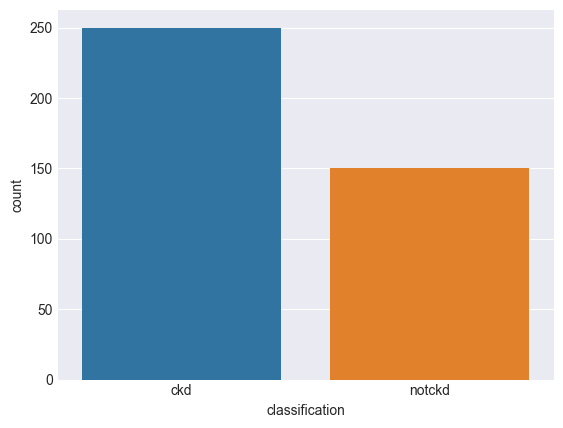

In [109]:
sns.countplot(x = "classification", data = data)

In [107]:
object_data= data.select_dtypes(include='object')
non_object_data= data.select_dtypes(exclude='object')

In [110]:
enc = LabelEncoder()

In [111]:
for i in range(0,object_data.shape[1]):
    object_data.iloc[:,i] = enc.fit_transform(object_data.iloc[:,i])

C:\Users\Eng_Dina\AppData\Local\Temp\ipykernel_15748\3231723907.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  object_data.iloc[:,i] = enc.fit_transform(object_data.iloc[:,i])


In [112]:
object_data

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,classification
0,1,1,0,0,1,1,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,1,0,1,0,1,0
3,1,0,1,0,1,0,0,1,1,1,0
4,1,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
395,1,1,0,0,0,0,0,0,0,0,1
396,1,1,0,0,0,0,0,0,0,0,1
397,1,1,0,0,0,0,0,0,0,0,1
398,1,1,0,0,0,0,0,0,0,0,1


In [113]:
new_data = pd.concat([object_data,non_object_data], axis=1)

In [114]:
new_data.dtypes

rbc                 int32
pc                  int32
pcc                 int32
ba                  int32
htn                 int32
dm                  int32
cad                 int32
appet               int32
pe                  int32
ane                 int32
classification      int32
age                 int64
bp                float64
sg                float64
al                float64
su                float64
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                 int64
wc                  int64
rc                float64
dtype: object

In [115]:
new_data

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,...,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
0,1,1,0,0,1,1,0,0,0,0,...,0.0,121.0,36.0,1.2,138.0,4.4,15.4,44,7800,5.2
1,1,1,0,0,0,0,0,0,0,0,...,0.0,121.0,18.0,0.8,138.0,4.4,11.3,38,6000,4.8
2,1,1,0,0,0,1,0,1,0,1,...,3.0,423.0,53.0,1.8,138.0,4.4,9.6,31,7500,4.8
3,1,0,1,0,1,0,0,1,1,1,...,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9
4,1,1,0,0,0,0,0,0,0,0,...,0.0,106.0,26.0,1.4,138.0,4.4,11.6,35,7300,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,1,1,0,0,0,0,0,0,0,0,...,0.0,140.0,49.0,0.5,150.0,4.9,15.7,47,6700,4.9
396,1,1,0,0,0,0,0,0,0,0,...,0.0,75.0,31.0,1.2,141.0,3.5,16.5,54,7800,6.2
397,1,1,0,0,0,0,0,0,0,0,...,0.0,100.0,26.0,0.6,137.0,4.4,15.8,49,6600,5.4
398,1,1,0,0,0,0,0,0,0,0,...,0.0,114.0,50.0,1.0,135.0,4.9,14.2,51,7200,5.9


In [116]:
x = new_data.drop(['classification'], axis=1)
y = new_data['classification']

In [117]:
x

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,...,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
0,1,1,0,0,1,1,0,0,0,0,...,0.0,121.0,36.0,1.2,138.0,4.4,15.4,44,7800,5.2
1,1,1,0,0,0,0,0,0,0,0,...,0.0,121.0,18.0,0.8,138.0,4.4,11.3,38,6000,4.8
2,1,1,0,0,0,1,0,1,0,1,...,3.0,423.0,53.0,1.8,138.0,4.4,9.6,31,7500,4.8
3,1,0,1,0,1,0,0,1,1,1,...,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9
4,1,1,0,0,0,0,0,0,0,0,...,0.0,106.0,26.0,1.4,138.0,4.4,11.6,35,7300,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,1,1,0,0,0,0,0,0,0,0,...,0.0,140.0,49.0,0.5,150.0,4.9,15.7,47,6700,4.9
396,1,1,0,0,0,0,0,0,0,0,...,0.0,75.0,31.0,1.2,141.0,3.5,16.5,54,7800,6.2
397,1,1,0,0,0,0,0,0,0,0,...,0.0,100.0,26.0,0.6,137.0,4.4,15.8,49,6600,5.4
398,1,1,0,0,0,0,0,0,0,0,...,0.0,114.0,50.0,1.0,135.0,4.9,14.2,51,7200,5.9


In [118]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: classification, Length: 400, dtype: int32

In [167]:
x_train,x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=2) 
print(x.shape, x_train.shape, x_test.shape)

(400, 24) (320, 24) (80, 24)


In [168]:
model_1 = LogisticRegression()
model_1.fit(x_train,y_train)
print(model_1.score(x_train,y_train))
print(model_1.score(x_test,y_test))

0.903125
0.9125


c:\Users\Eng_Dina\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [169]:
model_2 = RandomForestClassifier()
model_2.fit(x_train,y_train)
print(model_2.score(x_train,y_train))
print(model_2.score(x_test,y_test))

1.0
1.0


In [170]:
model_3 = DecisionTreeClassifier()
model_3.fit(x_train,y_train)
print(model_3.score(x_train,y_train))
print(model_3.score(x_test,y_test))

1.0
0.95


In [171]:
model_4 = KNeighborsClassifier()
model_4.fit(x_train,y_train)
print(model_4.score(x_train,y_train))
print(model_4.score(x_test,y_test))

0.79375
0.7125


In [172]:
model_5 = SVC(kernel='linear')
model_5.fit(x_train,y_train)
print(model_5.score(x_train,y_train))
print(model_5.score(x_test,y_test))

0.96875
0.95
